<a href="https://colab.research.google.com/github/MuhammedShiway/TEKNOFEST-2023/blob/main/TRAIN_VAL_TEST_SPLIT_%5BComplete%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
folder_path = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/PNG1024"
merge_path = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/MERGE 4/BIRADS"
new_folder =  "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/MERGE 4/BIRADS SPLIT"
xl_path = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/tabdata.xlsx"

In [ ]:
# Load data from Excel file into a pandas DataFrame
df = pd.read_excel(xl_path)
df.head()

,HASTANO,BIRADS KATEGORİSİ,MEME KOMPOZİSYONU,KADRAN BİLGİSİ (SAĞ),KADRAN BİLGİSİ (SOL),"Birads Skoru (EK BİLGİ OLARAK VERİLMİŞTİR, YARIŞMADA İSTENMEYECEKTİR)"
0,822670188,BI-RADS0,D,NaN,"[""MERKEZ""]",Kategori 0: Ek değerlendirme tetkiki yapılmalıdır
1,822670189,BI-RADS1-2,C,NaN,NaN,Kategori 1: Negatif (bir sorun yok)
2,822670197,BI-RADS0,D,"[""MERKEZ""]","[""MERKEZ""]",Kategori 0: Ek değerlendirme tetkiki yapılmalıdır
3,822670201,BI-RADS1-2,C,"[""ÜST DIŞ""]","[""ÜST DIŞ""]",Kategori 2: İyi huylu bulgular
4,822670202,BI-RADS1-2,D,NaN,NaN,Kategori 2: İyi huylu bulgular


# EDA

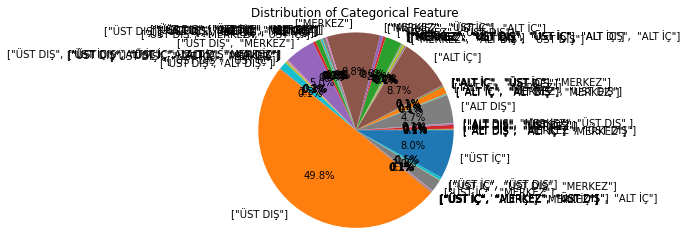

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by the categorical feature and count the number of occurrences
counts = df.groupby('KADRAN BİLGİSİ (SAĞ)').size()

# Create a pie chart with the counts
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categorical Feature')
plt.axis('equal')
plt.show()


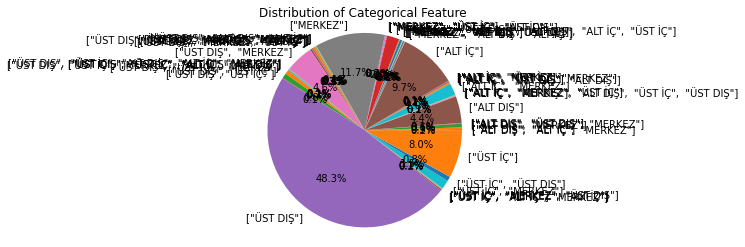

In [ ]:
counts = df.groupby('KADRAN BİLGİSİ (SOL)').size()

# Create a pie chart with the counts
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categorical Feature')
plt.axis('equal')
plt.show()

In [ ]:
df['KADRAN BİLGİSİ (SAĞ)'].value_counts()

51

In [ ]:
df['KADRAN BİLGİSİ (SAĞ)'].nunique()

51

In [ ]:
df['KADRAN BİLGİSİ (SOL)'].nunique()

52

In [ ]:
df['KADRAN BİLGİSİ (SOL)'].value_counts()

["ÜST DIŞ"]                                                 642
["MERKEZ"]                                                  155
["ALT İÇ"]                                                  129
["ÜST İÇ"]                                                  106
["ÜST DIŞ",  "MERKEZ"]                                       61
["ALT DIŞ"]                                                  59
["MERKEZ",  "ÜST DIŞ"]                                       27
["ALT İÇ",  "MERKEZ"]                                        26
["ÜST İÇ",  "MERKEZ"]                                        20
["ÜST DIŞ",  "ÜST İÇ"]                                       11
["ÜST İÇ",  "ÜST DIŞ"]                                       10
["ÜST DIŞ",  "ÜST İÇ",  "MERKEZ"]                             9
["ALT DIŞ",  "MERKEZ"]                                        8
["MERKEZ",  "ALT İÇ"]                                         5
["ÜST DIŞ",  "ALT İÇ"]                                        5
["ÜST DIŞ",  "MERKEZ",  "ÜST İÇ"]       

# CATEGORIES

In [ ]:
import os
import pandas as pd
import shutil

# Set the paths to the PNG1024 and ALL folders
png_folder =  "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/COMPOSITION"
all_folder = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/COMPOSITION CLASSES/ALL"

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(xl_path)

# Sort the DataFrame based on the BIRADS column
df = df.sort_values("MEME KOMPOZİSYONU")

# Loop through each group of patient folders with the same BIRADS rating
for birads, group in df.groupby("MEME KOMPOZİSYONU"):
    # Get the name of the subfolder in the ALL folder corresponding to this BIRADS rating
    if birads == "A":
        subfolder = "A"
    elif birads == "B":
        subfolder = "B"
    elif birads == "C":
        subfolder = "C"
    else:
        subfolder = "D"
    
    # Loop through each patient folder in this group and copy it to the corresponding subfolder
    for folder_name in group["HASTANO"]:
        source_path = os.path.join(png_folder, str(folder_name))
        dest_path = os.path.join(all_folder, subfolder, str(folder_name))
        shutil.copytree(source_path, dest_path)


# COPY FROM ALL TO TRAIN, VAL

In [ ]:
import os
import random
import shutil

# Set the paths to the ALL, TRAIN, and VAL folders
all_folder = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/COMPOSITION/ALL"
train_folder = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/COMPOSITION/SPLIT/Train"
val_folder ="/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/COMPOSITION/SPLIT/Val"

# Set the ratio of folders to copy to TRAIN and VAL
train_ratio = 0.8

# Loop through each subfolder in the ALL folder
for subfolder in ["A", "B", "C", "D"]:
    # Get a list of all folders in this subfolder
    all_subfolder_path = os.path.join(all_folder, subfolder)
    all_folders = os.listdir(all_subfolder_path)
    
    # Shuffle the list of folders to ensure random sampling
    random.shuffle(all_folders)
    
    # Determine the number of folders to copy to TRAIN and VAL
    num_train = int(len(all_folders) * train_ratio)
    num_val = len(all_folders) - num_train
    
    # Loop through the folders to copy to TRAIN
    for folder_name in all_folders[:num_train]:
        source_path = os.path.join(all_subfolder_path, folder_name)
        dest_path = os.path.join(train_folder, subfolder, folder_name)
        shutil.copytree(source_path, dest_path)
    
    # Loop through the folders to copy to VAL
    for folder_name in all_folders[num_train:]:
        source_path = os.path.join(all_subfolder_path, folder_name)
        dest_path = os.path.join(val_folder, subfolder, folder_name)
        shutil.copytree(source_path, dest_path)


# BIRADS TRAIN VAL SPLIT

In [ ]:
import os
import random
import shutil

# Set the paths to the ALL, TRAIN, and VAL folders
all_folder = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/BIRADS/ALL"
train_folder = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/BIRADS/SPLIT/Train"
val_folder ="/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/BIRADS/SPLIT/Val"

# Set the ratio of folders to copy to TRAIN and VAL
train_ratio = 0.8

# Loop through each subfolder in the ALL folder
for subfolder in ["BI-RADS0", "BI-RADS1-2", "BI-RADS4-5"]:
    # Get a list of all folders in this subfolder
    all_subfolder_path = os.path.join(all_folder, subfolder)
    all_folders = os.listdir(all_subfolder_path)
    
    # Shuffle the list of folders to ensure random sampling
    random.shuffle(all_folders)
    
    # Determine the number of folders to copy to TRAIN and VAL
    num_train = int(len(all_folders) * train_ratio)
    num_val = len(all_folders) - num_train
    
    # Loop through the folders to copy to TRAIN
    for folder_name in all_folders[:num_train]:
        source_path = os.path.join(all_subfolder_path, folder_name)
        dest_path = os.path.join(train_folder, subfolder, folder_name)
        shutil.copytree(source_path, dest_path)
    
    # Loop through the folders to copy to VAL
    for folder_name in all_folders[num_train:]:
        source_path = os.path.join(all_subfolder_path, folder_name)
        dest_path = os.path.join(val_folder, subfolder, folder_name)
        shutil.copytree(source_path, dest_path)
